# Linear Regression with Gradient Descent


Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent. In this notebook we will make use of gradient descent to fit a line to some data.


### 1. Make the necesary inputs

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

### 2. Generating the data

In [21]:
# generate a random array of size 100x1
x = np.random.rand(100 ,1) 
y = 4 + 3 * x + np.random.randn(100, 1)

The actual function that we used to generate the data is $y = 4 + 3x+ \epsilon$<br>
$\epsilon$ is some `Gaussian noise`. Let’s see what the equation found. <br>
We are aiming to find $y=b+wx$ with b=4 and w=3

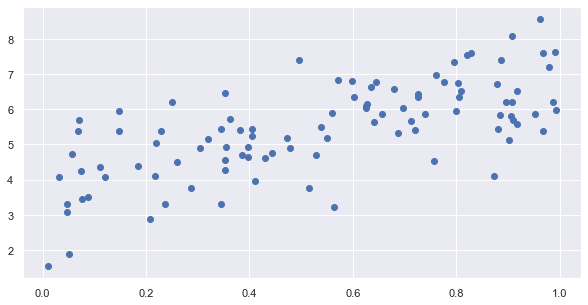

In [22]:
fig , ax = plt.subplots(1,1,figsize=(10,5))
plt.scatter(x,y);


The coefficients can be found with the following equation

$\hat{\Theta} = (X^TX)^{-1}X^T y$<br>
The dimension of $X \sim (N,1)$<br> and $\hat{\Theta} \sim (1,1)$<br><br>
If there are $p$ features we have :
The dimension of $X \sim (N,p)$<br> and $\hat{\Theta} \sim (p,1)$<br><br>
Let's add a column of ones to x using the `hstack` function

In [23]:
x = np.hstack([np.ones_like(x),x])

Solve for $\hat{\theta}$:

In [24]:
theta_est = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)

In [26]:
a = theta_est[0][0]
b = theta_est[1][0]
print('For the equation we found:',np.round(a,3),'+',np.round(b,3),'x')

For the equation we found: 3.8 + 3.046 x


We would have hoped for $a= 4$ and $b = 3$ instead of the numbers above. Close enough, but the noise made it impossible to recover the exact parameters of the original function. <br>
We can use this to start making predictions

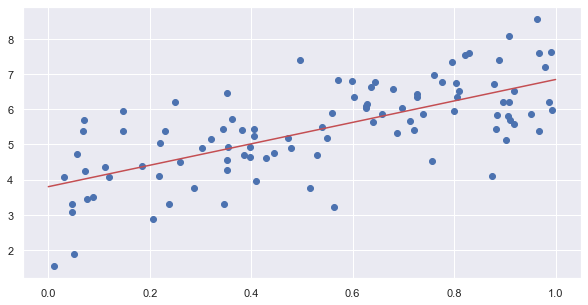

In [27]:
x_new = np.arange(0,1.1,0.1)
y_predict = a+b*x_new
fig , ax = plt.subplots(1,1,figsize=(10,5))
plt.scatter(x[:,1],y);
plt.plot(x_new,y_predict,'r');


## This is a lot easier using sklearn

We will repeat the same procedure but this time using sklearn

In [28]:
from sklearn.linear_model import LinearRegression
# We will use the module Linear Regression of sklearn to perform the analysis
# Initialize the model
ols = LinearRegression()
# Fit the model to the data
ols.fit(x,y)
# Extract the bias and weights of the linear model
sk_b = ols.intercept_[0]
sk_w = ols.coef_[0][1]
print('We now find:',np.round(sk_b,3),'+',np.round(sk_w,3),'x')
print('(same as before)')

We now find: 3.8 + 3.046 x
(same as before)


There is **computational complexity**:<br>
The Normal Equation computes the inverse of $X^T X$ , which is a $( p + 1) × ( p + 1)$ matrix (where $p$ is the number of features). The computational complexity of inverting such a matrix is typically about $O ( p^3 )$. <br>
In other words, if you double the number of features, you multiply the computation time by roughly $2^3 = 8$.<br>
If you want to double the number of predictions, then the increase in time is linear: you'll need twice as much time.

Now using Gradient Descent:<br>
First stap is calculating the gradient
To implement Gradient Descent, you need to compute the gradient of the cost function with regards to each model parameter $\theta_j$ . In other words, you need to calculate how much the cost function will change if you change $\theta_j$ just a little bit. This is called a partial derivative . It is like asking “what is the slope of the mountain under my feet if I face east?” 

The loss function used is **MSE** <br>
$$\text{MSE}(X,\Theta) = \frac{1}{N} \sum_{i=1}^{N} (x_i\Theta) $$ <br>
Here $x_i \sim (1,p)$ and $\Theta \sim (p,1)$. Each item $x_i$ is a row from the design matrix

The gradient which shows us the slope in each of $p$ direction in the domain of $x$ is given by:

$\nabla_{\Theta} = \frac{2}{N}X^T(X\Theta-y)$<br>
<br>
The gradient has dimension $(p,1)$

The procedure is as follows
1. start with an inital value of $\Theta$
2. calculate the gradient
3. calculate a new value for $\Theta$:<br>
$\Theta^{\text{new}}= \Theta - \eta \nabla_{\Theta}$<br>
4. Go Step 2<br>
Add an accuracy criterium.<br>
The parameter $\eta$ is called the learning rate

In [29]:
eta = 0.1 # learning rate 
n_iterations = 5 
N = x.shape[0] 
theta = np.random.randn(2, 1) # random initialization
for iteration in range ( n_iterations ):
    gradients = (2 / N) * x.T.dot(x.dot(theta)-y )
    theta = theta-eta * gradients 


In [30]:
a = theta[0,0]
b = theta[1,0]
print('We now find:',np.round(a,3),'+',np.round(b,3),'x')
print('(almost the same as before)')

We now find: 2.529 + 2.69 x
(almost the same as before)


#### If you increase the number of iterations, this coefficients will converge to the correct solution

The parameter 𝜂 is called the learning rate

In [31]:
import ipywidgets as widgets

In [35]:
slider =widgets.FloatSlider(
    value=0.3,
    min=0,
    max=10.0,
    step=0.01,
    description='Learn Rate:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
slider

FloatSlider(value=0.3, continuous_update=False, description='Learn Rate:', max=10.0, readout_format='.1f', ste…

In [38]:
eta = slider.value # learning rate 
n_iterations = 100
N = x.shape[0]
theta = np.zeros((2, n_iterations))
theta[:,0] = np.random.randn(2)

for i in np.arange(1,theta.shape[1]):
    gradients = (2 / N) * x.T.dot(x.dot(theta[:,i-1].reshape(-1,1))-y )
    theta[:,i] = theta[:,i-1]-(eta * gradients).reshape(-1,)

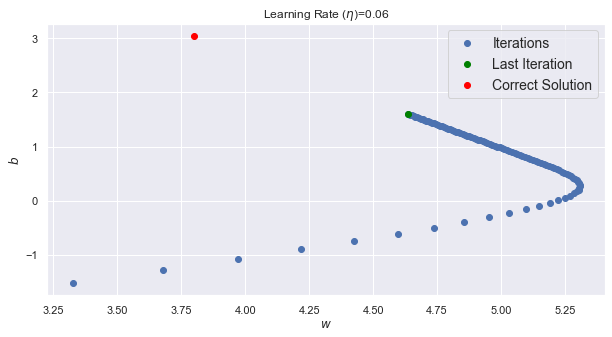

In [39]:
fig , ax = plt.subplots(1,1,figsize=(10,5))
plt.scatter(theta[0,:], theta[1,:], label='Iterations');
plt.scatter(theta[0,-1],theta[1,-1], color='green',label='Last Iteration');
plt.scatter([sk_b],[sk_w],color='red',label='Correct Solution')
plt.xlabel('$w$')
plt.ylabel('$b$')
plt.title('Learning Rate ($\eta$)='+ str(eta))
plt.legend(fontsize=14);

In [15]:

print("Shape of the gradients:", gradients.shape)

Shape of the gradients: (2, 1)


In [16]:
print("Shape of theta:", theta[:,i-1].shape)

Shape of theta: (2,)
